My training of AB emus isn't working... going to explore

In [1]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import numpy as np
from pearce.mocks.kittens import TrainingBox, MDHR

In [3]:
cat = TrainingBox(boxno=0, system = 'sherlock')

In [4]:
cat.load(1.0, HOD = 'fsabZheng07', hod_kwargs={'sec_haloprop_key': 'halo_local_density_10'})

/home/users/swmclau2/.local/lib/python2.7/site-packages/halotools/empirical_models/factories/hod_model_factory.py:741: UserWarning: 

The param_dict key sigma_logM appears in more than one component model.
This is permissible, but if you are seeing this message you should be sure you understand it.
In particular, double-check that this parameter does not have conflicting meanings across components.

If you do not wish to see this message every time you instantiate, 
simply attach a _suppress_repeated_param_warning attribute 
to any of your component models and set this variable to ``True``.

  warn(msg % key)
/home/users/swmclau2/.local/lib/python2.7/site-packages/halotools/empirical_models/factories/hod_model_factory.py:741: UserWarning: 

The param_dict key logMmin appears in more than one component model.
This is permissible, but if you are seeing this message you should be sure you understand it.
In particular, double-check that this parameter does not have conflicting meanings acr

In [5]:
cat.halocat.halo_table.colnames

['halo_upid',
 'halo_vx',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_rvir',
 'halo_mvir',
 'halo_id',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density_1',
 'halo_local_density_5',
 'halo_local_density_10',
 'halo_mvir_host_halo']

In [6]:
cat.model.param_dict

{'alpha': 1.06,
 'logM0': 11.38,
 'logM1': 13.31,
 'logMmin': 12.02,
 'mean_occupation_centrals_assembias_param1': 0.5,
 'mean_occupation_centrals_assembias_split1': 0.5,
 'mean_occupation_satellites_assembias_param1': 0.5,
 'mean_occupation_satellites_assembias_split1': 0.5,
 'sigma_logM': 0.26}

In [7]:
print cat.model.param_dict.keys()

['logMmin', 'mean_occupation_centrals_assembias_param1', 'logM0', 'sigma_logM', 'mean_occupation_centrals_assembias_split1', 'mean_occupation_satellites_assembias_split1', 'mean_occupation_satellites_assembias_param1', 'logM1', 'alpha']


In [8]:
default_params = cat.model.param_dict
default_params['mean_occupation_centrals_assembias_param1'] = 0.0
default_params['mean_occupation_satellites_assembias_param1'] = 0.0
#default_params['mean_occupation_centrals_assembias_split1'] = 0.5
#default_params['mean_occupation_satellites_assembias_split1'] = 0.5

In [9]:
default_params['sigma_logM'] = 0.5
default_params['logMmin'] = 13.5

In [10]:
cat.model.model_dictionary['centrals_occupation'].sec_haloprop_key

'halo_local_density_10'

In [11]:
r_bins = np.logspace(-1.1, 1.6, 19)
rbc = (r_bins[1:]+r_bins[:-1])/2.0

In [12]:
#default_y = np.zeros((18,))
#for i in xrange(N):
#    print i,
cat.populate(default_params)
default_y= cat.calc_xi(r_bins)
#default_y/=N

In [13]:
N = 6
cmap = sns.color_palette("GnBu_d", N)

In [17]:
default_params['mean_occupation_centrals_assembias_param1'] = 1.0

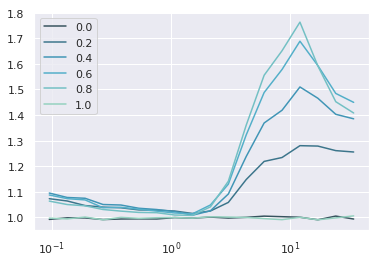

In [18]:
pname = 'mean_occupation_centrals_assembias_split1'
#l, h = -1.0, 1.0
l, h = 0.0, 1.0

d = default_params.copy()
for v, c in zip(np.linspace(l,h,N), cmap):
    d[pname] = v
    #y = np.zeros((18,))
    #for i in xrange(N):
       # print i,
    cat.populate(d)
    y= cat.calc_xi(r_bins)
    #y/=N
    plt.plot(rbc, y/default_y, label = v, c = c)
    
plt.xscale('log')
#plt.loglog()
plt.legend(loc = 'best')
plt.show();

In [ ]:
plt.hist(np.log(cat.halocat.halo_table['halo_nfw_conc'][np.isfinite(cat.halocat.halo_table['halo_nfw_conc'])] ))